<a href="https://colab.research.google.com/github/Rohit-Madhesiya/ML_Colab_Repos/blob/main/Sales_Prediction_by_Advertisement_using_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
advertising_df=pd.read_csv('/content/Advertising_2023.csv',index_col=0)

In [ ]:
advertising_df.head()

,digital,TV,radio,newspaper,sales
1,345.15,156.0,37.8,69.2,22.1
2,66.75,46.0,39.3,45.1,10.4
3,25.80,18.3,45.9,69.3,9.3
4,227.25,145.1,41.3,58.5,18.5
5,271.20,165.2,10.8,58.4,12.9


In [ ]:
advertising_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1199 entries, 1 to 1197
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   digital    1199 non-null   float64
 1   TV         1199 non-null   float64
 2   radio      1199 non-null   float64
 3   newspaper  1199 non-null   float64
 4   sales      1199 non-null   float64
dtypes: float64(5)
memory usage: 56.2 KB


In [ ]:
advertising_df.describe()

,digital,TV,radio,newspaper,sales
count,1199.000000,1199.00000,1199.000000,1199.000000,1199.000000
mean,135.472394,146.61985,23.240617,30.529942,14.005505
std,135.730821,85.61047,14.820827,21.712507,5.202804
min,0.300000,0.70000,0.000000,0.300000,1.600000
25%,24.250000,73.40000,9.950000,12.800000,10.300000
50%,64.650000,149.70000,22.500000,25.600000,12.900000
75%,256.950000,218.50000,36.500000,45.100000,17.400000
max,444.600000,296.40000,49.600000,114.000000,27.000000


In [ ]:
advertising_df.isnull().sum()

,0
digital,0
TV,0
radio,0
newspaper,0
sales,0


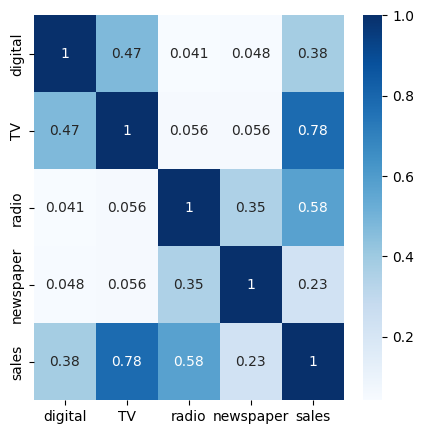

In [15]:
plt.figure(figsize=(5,5))
sns.heatmap(advertising_df.corr(),annot=True,cmap='Blues')
plt.show()

x->feature values

---

y->target values

In [18]:
x=advertising_df.drop(['sales'],axis=1)
y=advertising_df['sales']
x.head()

,digital,TV,radio,newspaper
1,345.15,156.0,37.8,69.2
2,66.75,46.0,39.3,45.1
3,25.80,18.3,45.9,69.3
4,227.25,145.1,41.3,58.5
5,271.20,165.2,10.8,58.4


In [19]:
y.head()

,sales
1,22.1
2,10.4
3,9.3
4,18.5
5,12.9


Scale the Data:Normalization

In [22]:
normalized_feature=keras.utils.normalize(x.values)
print(normalized_feature)

[[0.89211961 0.4032179  0.0977028  0.17886333]
 [0.66254734 0.45658693 0.39008405 0.44765371]
 [0.29009225 0.20576311 0.51609436 0.77920128]
 ...
 [0.06744611 0.99272247 0.05163843 0.08536149]
 [0.19480049 0.91868871 0.08898294 0.33188231]
 [0.06744611 0.99272247 0.05163843 0.08536149]]


Train Test Split

In [25]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.4,random_state=3)

In [27]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(719, 4) (480, 4) (719,) (480,)


Train the model using Keras

In [29]:
model=Sequential()
model.add(Dense(4,activation='relu'))
model.add(Dense(3,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse',metrics=['mse'])

history=model.fit(X_train,Y_train,validation_data=(X_test,Y_test), epochs=32)




Epoch 1/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 26079.1953 - mse: 26079.1953 - val_loss: 19536.1348 - val_mse: 19536.1348
Epoch 2/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 19535.3750 - mse: 19535.3750 - val_loss: 15256.3867 - val_mse: 15256.3867
Epoch 3/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14730.6436 - mse: 14730.6436 - val_loss: 12362.6738 - val_mse: 12362.6738
Epoch 4/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11590.4355 - mse: 11590.4355 - val_loss: 10245.7119 - val_mse: 10245.7119
Epoch 5/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10161.3643 - mse: 10161.3643 - val_loss: 8642.8467 - val_mse: 8642.8467
Epoch 6/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8348.9688 - mse: 8348.9688 - val_loss: 7389.4976 - val_mse: 7389.4976
Epoch 7/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7256.1431 - mse: 7256.1431 - val_loss: 5370.3535 - val_mse: 5370.3535
Epoch 8/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4543.3052 - mse: 4543.3052 

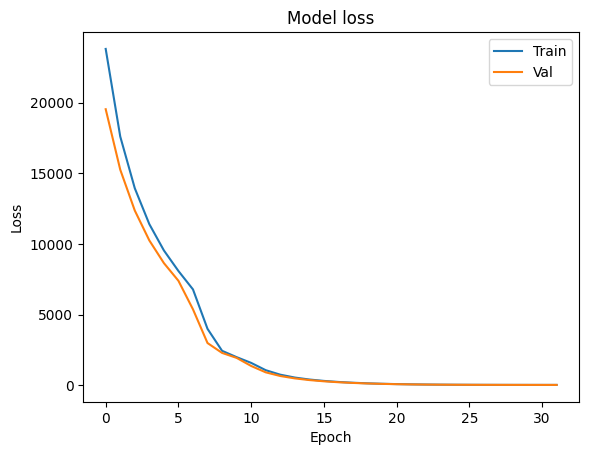

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Val'],loc='upper right')
plt.show()

Model Evaluation

In [35]:
predict_train=model.predict(X_train)
print(np.sqrt(mean_squared_error(Y_train,predict_train)))
predict_test=model.predict(X_test)
print(np.sqrt(mean_squared_error(Y_test,predict_test)))

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4.17064761512168
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
4.174724049366258
